In [46]:
import numpy as np
from scipy.stats import t, expon
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from TruncatedNormal import TruncatedNormal
import matplotlib.pyplot as plt
from sampler_newmodel import *


## Diagnostics of the Sampler

In [89]:
T=100
r=np.load("./data/r.npy")
eps_truth=np.load("./data/eps_truth.npy")
print(r.shape)
beta_r=0.15
alpha_r=0.2
params=(alpha_r, beta_r, 6.0, 1, 0.4, 0.1, 0.02, 2.5)
sampler=TEST_SAMPLER(T,params,path='./pth/VIScaler_test1_199.pth')

(100, 1)


### ESS plot

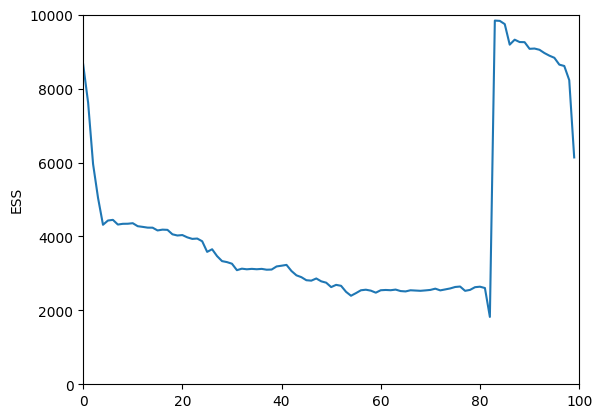

<Figure size 640x480 with 0 Axes>

In [93]:
samples,weights=sampler.sample(10000,r,resample_thre=0.2)
sampler.plot_ESS()

In [94]:
sampler.ESS_list

[8657.641183075362,
 7620.735013847239,
 5958.202748079856,
 5043.643983754713,
 4315.334696122417,
 4430.521588755971,
 4448.532917942557,
 4321.557556482006,
 4341.714544252596,
 4343.658320421171,
 4358.0875879323885,
 4276.909667390153,
 4258.6419521839725,
 4238.338640296072,
 4236.917323960534,
 4162.198589665373,
 4183.896032169271,
 4178.070493086153,
 4057.7658083901274,
 4025.4382942482157,
 4037.2511421098825,
 3975.14528826897,
 3933.753274405047,
 3942.8676210569597,
 3869.5900034990223,
 3582.5696330155647,
 3653.180249311809,
 3467.313781379021,
 3332.420544022429,
 3305.2963209292607,
 3262.1258360506818,
 3087.254851376624,
 3127.8365278474043,
 3111.1006247909995,
 3122.4061504895117,
 3112.322431436316,
 3122.19059985724,
 3099.8846519688927,
 3104.2099323569473,
 3188.426649146281,
 3208.0835042582376,
 3230.0338589198086,
 3064.6696582491422,
 2947.7466290405914,
 2897.908297229572,
 2815.265597870286,
 2803.9991728872255,
 2862.6665080545695,
 2785.388489566812,
 

### Histogram of the last entry

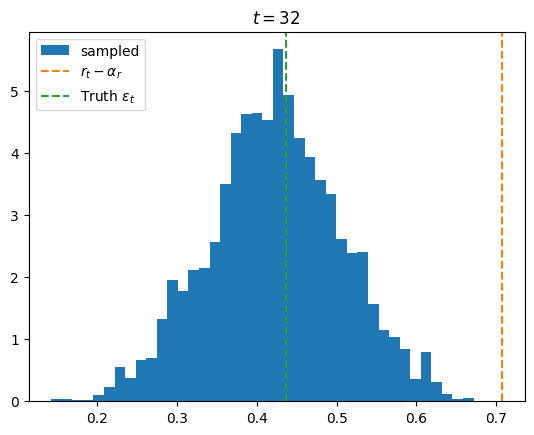

In [102]:
i=31
index = np.random.choice(list(range(len(weights))), p=weights, size=(len(weights)))
plt.hist((samples[:,i])[index], density=True, bins=40, label="sampled")
plt.axvline(x=r[i]-alpha_r,ls="--",c="C1",label=r"$r_t-\alpha_r$")
plt.axvline(x=eps_truth[i],ls="--",c="C2",label=r"Truth $\epsilon_t$")
plt.title(f"$t={i+1}$")
plt.legend()
plt.show()


### Unique values

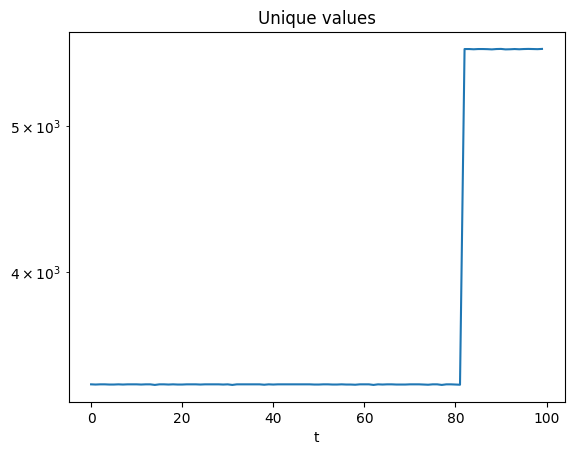

In [99]:
plt.figure()
unique_val=[]
for t in range(T):
    unique_val.append(np.unique(samples[:,t][index]).shape[0])

# plt.show()
#print(unique_val)
plt.plot(unique_val)
plt.title("Unique values")
plt.xlabel("t")
plt.yscale("log")
plt.show()

Check if the variational distribution matches the truth posterior distirbution

/Users/hengyuf/Library/CloudStorage/OneDrive-北京大学/大学学习/数学/Bayes/VSMCG/sampler_newmodel.py:224: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs=param_to_input(torch.tensor(rr),torch.tensor(eps_past),torch.tensor(r_past),torch.tensor(self.alpha_r),torch.tensor(self.beta_r),
/Users/hengyuf/Library/CloudStorage/OneDrive-北京大学/大学学习/数学/Bayes/VSMCG/sampler_newmodel.py:229: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  assert torch.tensor(eps_past).shape[0]==outputs.shape[0]


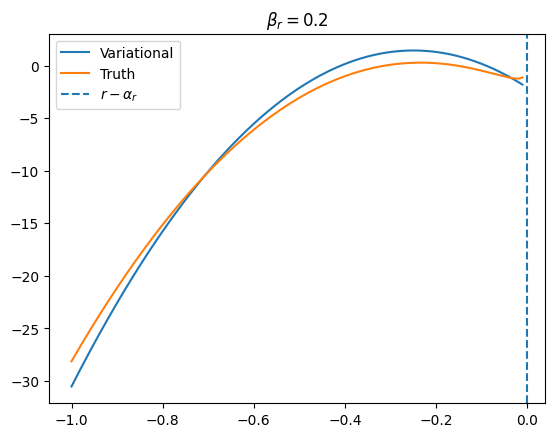

In [16]:

N=1000
r=0.1
r_past=1
eps=torch.linspace(-1,r-alpha_r-0.01,N)
eps_past=r_past-alpha_r-1e-2-0.1*torch.ones_like(eps)#torch.rand_like(eps)
log_prob=sampler.log_policy_density(eps=eps,eps_past=eps_past,rr=r,r_past=r_past)
log_prob_truth=sampler.log_likelihood_update(epsilon=eps.detach().numpy(),r=r,epsilon_past=eps_past.detach().numpy(),r_past=r_past)
plt.plot(eps,log_prob.detach().numpy(),label="Variational")
plt.plot(eps,log_prob_truth,label='Truth')
plt.title(r"$\beta_r=$"+f"{beta_r}")
plt.axvline(x=r-alpha_r,ls="--",label=r"$r-\alpha_r$")
plt.legend()
plt.show()